<h1>Binning</h1>
<p>1.Equal-width binning:</p>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = sns.load_dataset("titanic")
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
82,1,3,female,NaN,0,0,7.7875,Q,Third,woman,False,NaN,Queenstown,yes,True
650,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
45,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.dropna(inplace=True)

In [5]:
df["age"].describe()

count    182.000000
mean      35.623187
std       15.671615
min        0.920000
25%       24.000000
50%       36.000000
75%       47.750000
max       80.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

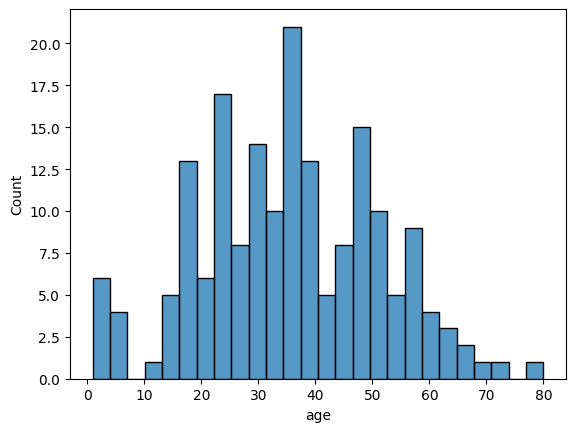

In [12]:
sns.histplot(df["age"],bins=26)

<h1>Equal-width binning</h1>

In [15]:
feature_to_bin = "age"
n_bins = 10

bin_width = (df[feature_to_bin].max() - df[feature_to_bin].min()) / n_bins
bins = [df[feature_to_bin].min() + i * bin_width for i in range(n_bins + 1)]
df["age_bin"] = pd.cut(df[feature_to_bin], bins[:-1])
df["age_bin"]

1       (32.552, 40.46]
3       (32.552, 40.46]
6      (48.368, 56.276]
10        (0.92, 8.828]
11     (56.276, 64.184]
             ...       
871     (40.46, 48.368]
872     (32.552, 40.46]
879    (48.368, 56.276]
887    (16.736, 24.644]
889    (24.644, 32.552]
Name: age_bin, Length: 182, dtype: category
Categories (9, interval[float64, right]): [(0.92, 8.828] < (8.828, 16.736] < (16.736, 24.644] < (24.644, 32.552] ... (40.46, 48.368] < (48.368, 56.276] < (56.276, 64.184] < (64.184, 72.092]]

In [17]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(32.552, 40.46]"
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(32.552, 40.46]"
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,"(48.368, 56.276]"
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,"(0.92, 8.828]"
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,"(56.276, 64.184]"


<Axes: xlabel='age_bin'>

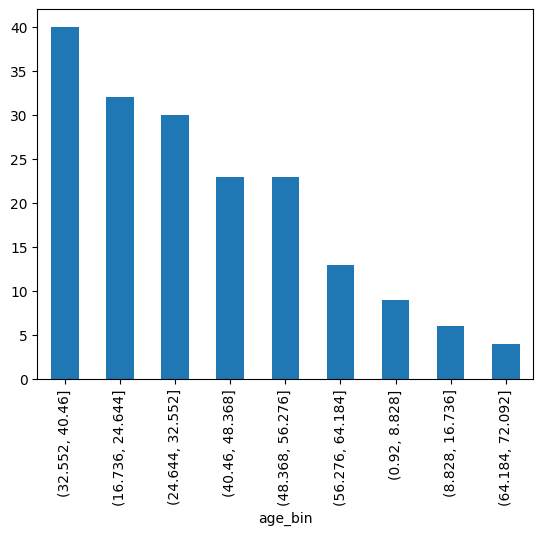

In [19]:
df["age_bin"].value_counts().plot(kind="bar")